<a href="https://colab.research.google.com/github/faust-lvii/GlobalAIHub_MCA/blob/main/Globbalaihub_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
dataset_path = '/content/insurance.csv'
df =pd.read_csv(dataset_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


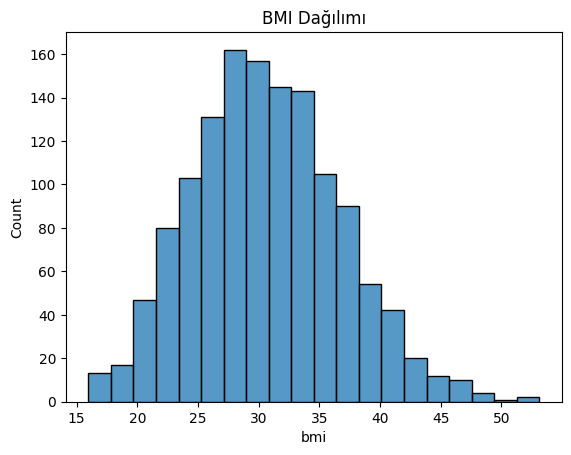

In [ ]:
#BMI dağılımı
sns.histplot(data=df, x='bmi', bins=20)
plt.title('BMI Dağılımı')
plt.show()

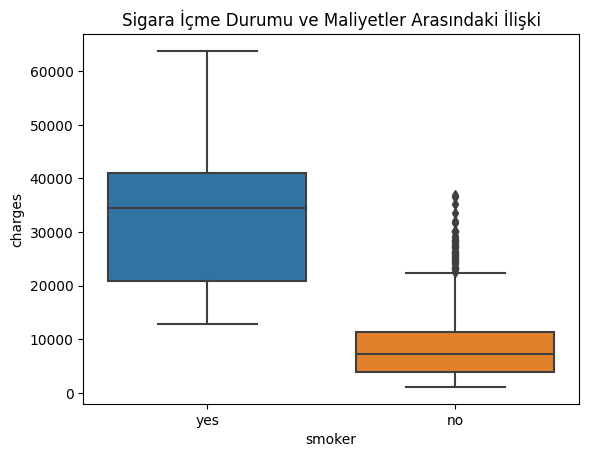

In [ ]:
#Sigara İçme Durumu ve Maliyetler Arasındaki İlişki
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Sigara İçme Durumu ve Maliyetler Arasındaki İlişki')
plt.show()

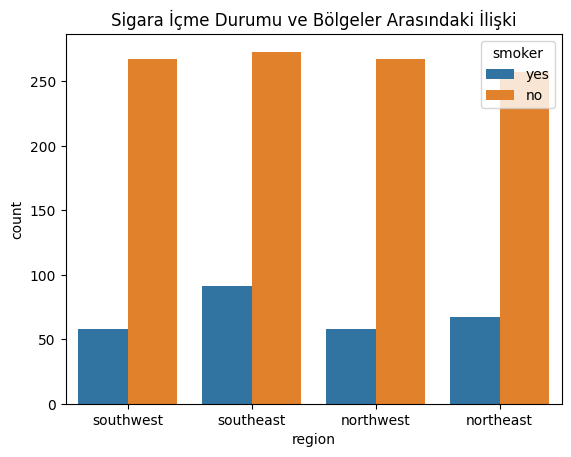

In [ ]:
# Sigara İçme Durumu ve Bölgeler Arasındaki İlişki
sns.countplot(data=df, x='region', hue='smoker')
plt.title('Sigara İçme Durumu ve Bölgeler Arasındaki İlişki')
plt.show()

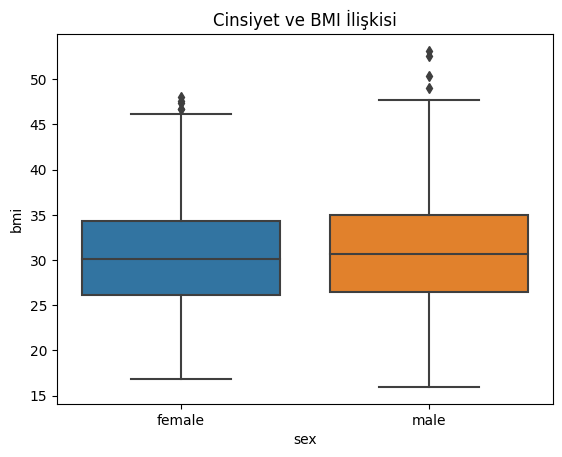

In [ ]:
#Cinsiyet ve BMI İlişkisi
sns.boxplot(data=df, x='sex', y='bmi')
plt.title('Cinsiyet ve BMI İlişkisi')
plt.show()

In [ ]:
#En fazla çocuğa sahip bölge
region_with_most_children = df.groupby('region')['children'].sum().idxmax()
print("En fazla çocuğa sahip bölge:", region_with_most_children)

En fazla çocuğa sahip bölge: southeast


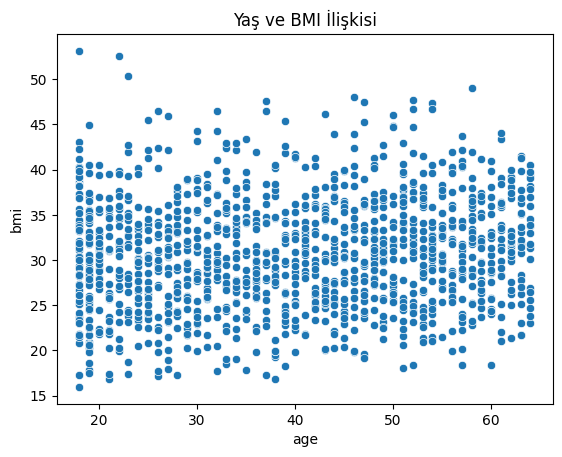

In [ ]:
#Yaş ve BMI İlişkisi
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Yaş ve BMI İlişkisi')
plt.show()

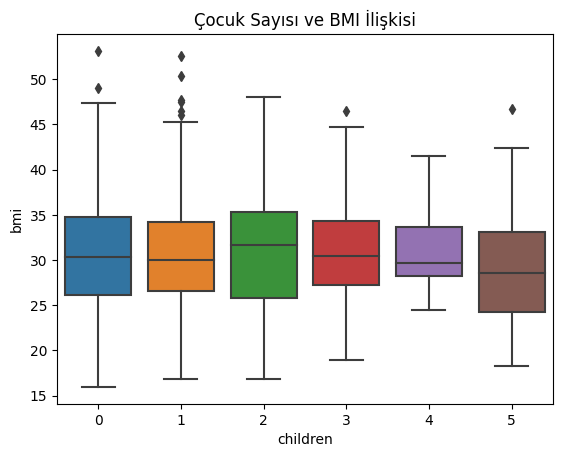

In [ ]:
#Çocuk Sayısı ve BMI İlişkisi
sns.boxplot(data=df, x='children', y='bmi')
plt.title('Çocuk Sayısı ve BMI İlişkisi')
plt.show()


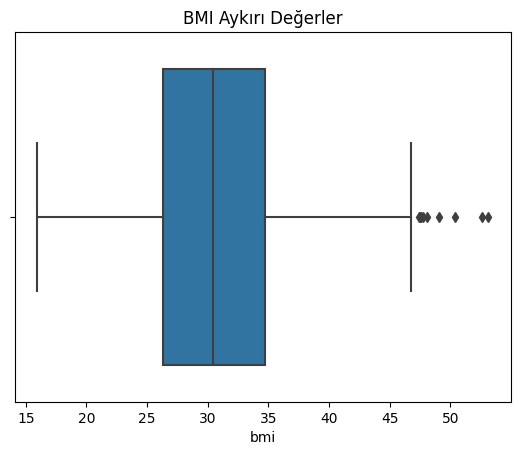

In [ ]:
#BMI Aykırı Değerler
sns.boxplot(data=df, x='bmi')
plt.title('BMI Aykırı Değerler')
plt.show()


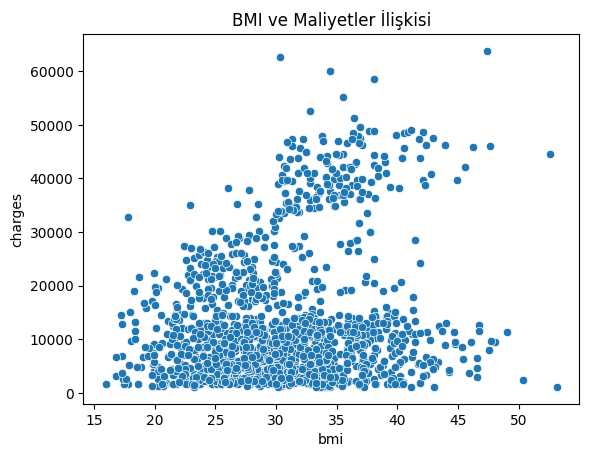

In [ ]:
#BMI ve Maliyetler İlişkisi
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI ve Maliyetler İlişkisi')
plt.show()


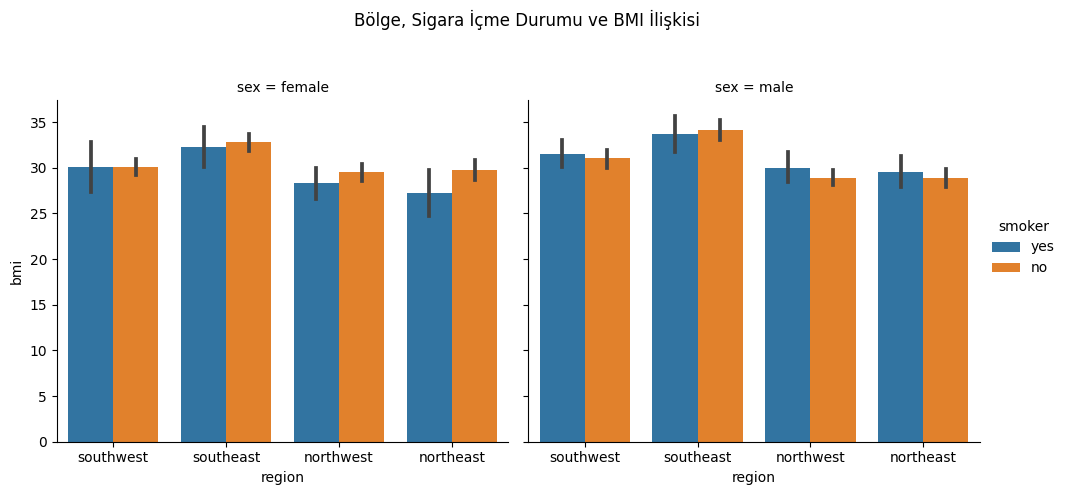

In [ ]:
#Bölge, Sigara İçme Durumu ve BMI İlişkisi
sns.catplot(data=df, x='region', hue='smoker', col='sex', y='bmi', kind='bar')
plt.subplots_adjust(top=0.8)
plt.suptitle('Bölge, Sigara İçme Durumu ve BMI İlişkisi')
plt.show()


In [ ]:
#Label Encoding ve ONE-HOT Encoding
dataset_path = '/content/insurance.csv'
df = pd.read_csv(dataset_path)

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(drop='first')

df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

bolge_encoded = onehot_encoder.fit_transform(df[['region']])
bolge_encoded_df = pd.DataFrame(bolge_encoded.toarray(), columns=['bolge_B', 'bolge_C', 'bolge_D'])
df = pd.concat([df, bolge_encoded_df], axis=1)

X = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("X_train_scaled:\n", X_train_scaled_df.head())
print("\nX_test_scaled:\n", X_test_scaled_df.head())

X_train_scaled:
         age       bmi  children  sex_encoded  smoker_encoded  bolge_B  \
0  0.608696  0.107345       0.4          0.0             0.0      1.0   
1  0.630435  0.224913       0.0          0.0             0.0      0.0   
2  0.739130  0.239440       0.0          0.0             0.0      0.0   
3  0.456522  0.493947       1.0          0.0             0.0      0.0   
4  0.782609  0.148238       0.6          0.0             0.0      1.0   

   bolge_C  bolge_D  
0      0.0      0.0  
1      0.0      0.0  
2      1.0      0.0  
3      1.0      0.0  
4      0.0      0.0  

X_test_scaled:
         age       bmi  children  sex_encoded  smoker_encoded  bolge_B  \
0  0.586957  0.247915       0.4          0.0             0.0      0.0   
1  0.391304  0.378262       0.0          0.0             0.0      1.0   
2  1.000000  0.293920       0.0          0.0             1.0      1.0   
3  0.608696  0.263250       0.6          1.0             0.0      1.0   
4  0.021739  0.429379       0.

In [ ]:
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)

linear_reg_scores = cross_val_score(linear_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
random_forest_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

linear_reg_rmse_scores = -linear_reg_scores
random_forest_rmse_scores = -random_forest_scores

print("Linear Regression RMSE Scores:", linear_reg_rmse_scores)
print("Random Forest RMSE Scores:", random_forest_rmse_scores)

print("Linear Regression Mean RMSE:", linear_reg_rmse_scores.mean())
print("Random Forest Mean RMSE:", random_forest_rmse_scores.mean())

Linear Regression RMSE Scores: [40131832.90918393 32077034.53122962 35910188.224674   46590418.12240702
 35029981.45664621]
Random Forest RMSE Scores: [25728455.33092807 16372077.48056198 26753958.4629961  29785238.56276072
 25647395.85236851]
Linear Regression Mean RMSE: 37947891.048828155
Random Forest Mean RMSE: 24857425.137923077


In [ ]:
# Hiperparametrelerin farklı değerleri
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV ile en iyi hiperparametreleri bulma
grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri görüntüleme
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi modeli elde etme
best_model = grid_search.best_estimator_

# Test verisi ile en iyi modelin performansını değerlendirme
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("En iyi modelin RMSE:", rmse)

En iyi hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
En iyi modelin RMSE: 4361.609095092551


In [ ]:
# Modeli test verisiyle değerlendirme
y_pred = best_model.predict(X_test_scaled)

# Hata metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# R-Kare (Coefficient of Determination) hesaplama
r2 = r2_score(y_test, y_pred)

# Sonuçları görüntüleme
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R2) Score:", r2)


Mean Squared Error (MSE): 19023633.898394063
Root Mean Squared Error (RMSE): 4361.609095092551
Mean Absolute Error (MAE): 2481.3160201633746
R-Squared (R2) Score: 0.8774635147379474
